In [1]:
import pandas as pd
import io
import tensorflow as tf
from tensorflow import keras
import numpy as np

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam


import matplotlib.pyplot as plt
import tabulate


df = pd.read_csv('https://raw.githubusercontent.com/hongsukyi/Lectures/main/vds/vds.csv')

df.head()

,Date,ToVol,SmVol,MeVol,LaVol,Speed,Occ.Rate
0,2017-04-02 0:00,43,34,9,0,50.3,1.90
1,2017-04-02 0:05,45,32,13,0,58.9,1.84
2,2017-04-02 0:10,46,34,12,0,50.6,1.87
3,2017-04-02 0:15,45,36,9,0,50.9,1.72
4,2017-04-02 0:20,27,13,13,1,62.2,1.12


In [2]:
print(df.columns)


Index(['Date', 'ToVol', 'SmVol', 'MeVol', 'LaVol', 'Speed', 'Occ.Rate'], dtype='object')


In [3]:
num_classes = 3
class_labels = ['Jam', 'Slow', 'Normal']

def get_score(speed):
    if speed < 30:
        label = 'Jam'
    elif speed < 50:
        label = 'Slow'
    else:
        label = 'Normal'
    return label

class_dic = {'Jam': 0, 'Slow': 1, 'Normal': 2}

df['label_speed'] = df['Speed'].apply(lambda i: get_score(i))
df['label_speed'] = df['label_speed'].apply(lambda i: class_dic[i])

df.head()


,Date,ToVol,SmVol,MeVol,LaVol,Speed,Occ.Rate,label_speed
0,2017-04-02 0:00,43,34,9,0,50.3,1.90,2
1,2017-04-02 0:05,45,32,13,0,58.9,1.84,2
2,2017-04-02 0:10,46,34,12,0,50.6,1.87,2
3,2017-04-02 0:15,45,36,9,0,50.9,1.72,2
4,2017-04-02 0:20,27,13,13,1,62.2,1.12,2


In [4]:
df.columns

Index(['Date', 'ToVol', 'SmVol', 'MeVol', 'LaVol', 'Speed', 'Occ.Rate',
       'label_speed'],
      dtype='object')

In [5]:
df['label_speed'] = df['Speed'].apply(lambda spd: get_score(spd))
df.head()

,Date,ToVol,SmVol,MeVol,LaVol,Speed,Occ.Rate,label_speed
0,2017-04-02 0:00,43,34,9,0,50.3,1.90,Normal
1,2017-04-02 0:05,45,32,13,0,58.9,1.84,Normal
2,2017-04-02 0:10,46,34,12,0,50.6,1.87,Normal
3,2017-04-02 0:15,45,36,9,0,50.9,1.72,Normal
4,2017-04-02 0:20,27,13,13,1,62.2,1.12,Normal


In [6]:
df['label_speed'].unique()

array(['Normal', 'Slow', 'Jam'], dtype=object)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
class_dic = {'Jam': 0, 'Slow': 1, 'Normal': 2}
df['label_speed'] = df['label_speed'].apply(lambda i : class_dic[i])
df.head()

,Date,ToVol,SmVol,MeVol,LaVol,Speed,Occ.Rate,label_speed
0,2017-04-02 0:00,43,34,9,0,50.3,1.90,2
1,2017-04-02 0:05,45,32,13,0,58.9,1.84,2
2,2017-04-02 0:10,46,34,12,0,50.6,1.87,2
3,2017-04-02 0:15,45,36,9,0,50.9,1.72,2
4,2017-04-02 0:20,27,13,13,1,62.2,1.12,2


### Sklearn을 이용한 데이터 분할

In [9]:
features = ['ToVol', 'LaVol', 'MeVol', 'SmVol', 'Occ.Rate']
X = df[features]
y = df['label_speed']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6451, 5) (6451,)
(1613, 5) (1613,)


### Standardize


In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
print(X_train.shape)

(6451, 5)


In [13]:
print(X_train[1].shape)

(5,)


In [14]:
num_features = len(X_train[1])
print('number of features : ', num_features)

number of features :  5


In [15]:
scalar = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train

array([[-1.03431236, -0.75262163, -1.06819167, -0.94977398, -0.61081493],
       [-1.0032784 , -0.75262163, -0.8617752 , -0.99216665, -0.61941343],
       [-0.98776142, -0.75262163, -0.91337932, -0.94977398, -0.61511418],
       ...,
       [ 0.85875951,  0.55781349,  0.73795251,  0.85191465,  0.24903504],
       [ 1.0449633 , -0.09740407,  1.04757722,  1.00028901,  0.57291187],
       [ 0.59497081,  1.86824862,  0.68634839,  0.47038059,  0.05126955]])

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, optimizers
from tensorflow.keras.layers import Flatten, Dense, Softmax

In [17]:
# Simple MLP model with 2 classes
num_neurons = 20
def model_mlp():
  model = Sequential([
      Dense(num_neurons, activation='relu', input_shape=[num_features]),
      Dense(num_classes, activation='sigmoid')
  ])
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

In [18]:
model = model_mlp()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                120       
                                                                 
 dense_1 (Dense)             (None, 3)                 63        
                                                                 
Total params: 183
Trainable params: 183
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Simple MLP model with 3 classes
num_neurons = 20
def model_mlp_softmax():
  model = Sequential([
      Dense(num_neurons, activation='relu', input_shape=[num_features]),
      Dense(num_classes, activation='softmax')
  ])
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

In [20]:
model_0 = model_mlp_softmax()
model_0.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 20)                120       
                                                                 
 dense_3 (Dense)             (None, 3)                 63        
                                                                 
Total params: 183
Trainable params: 183
Non-trainable params: 0
_________________________________________________________________


### training data

In [23]:
!pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
from livelossplot import PlotLossesKeras


In [25]:
"""
history = model.fit(X_train, y_train, epochs=40, 
                    validation_split=0.15,
                    batch_size=64,
                    callbacks=[PlotLossesKeras()])
"""

'\nhistory = model.fit(X_train, y_train, epochs=40, \n                    validation_split=0.15,\n                    batch_size=64,\n                    callbacks=[PlotLossesKeras()])\n'

In [26]:
"""
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)

# Print the loss and accuracy
print("Test Loss of the model:", loss)
print("Test Accuracy of the model:", accuracy)

"""

'\n# Evaluate the model on the test set\nloss, accuracy = model.evaluate(X_test, y_test)\n\n# Print the loss and accuracy\nprint("Test Loss of the model:", loss)\nprint("Test Accuracy of the model:", accuracy)\n\n'

In [27]:
"""
# Evaluate the model on the test set
loss, accuracy = model_0.evaluate(X_test, y_test)

# Print the loss and accuracy
print("Test Loss of the model_0:", loss)
print("Test Accuracy of the model_0:", accuracy)
"""

'\n# Evaluate the model on the test set\nloss, accuracy = model_0.evaluate(X_test, y_test)\n\n# Print the loss and accuracy\nprint("Test Loss of the model_0:", loss)\nprint("Test Accuracy of the model_0:", accuracy)\n'

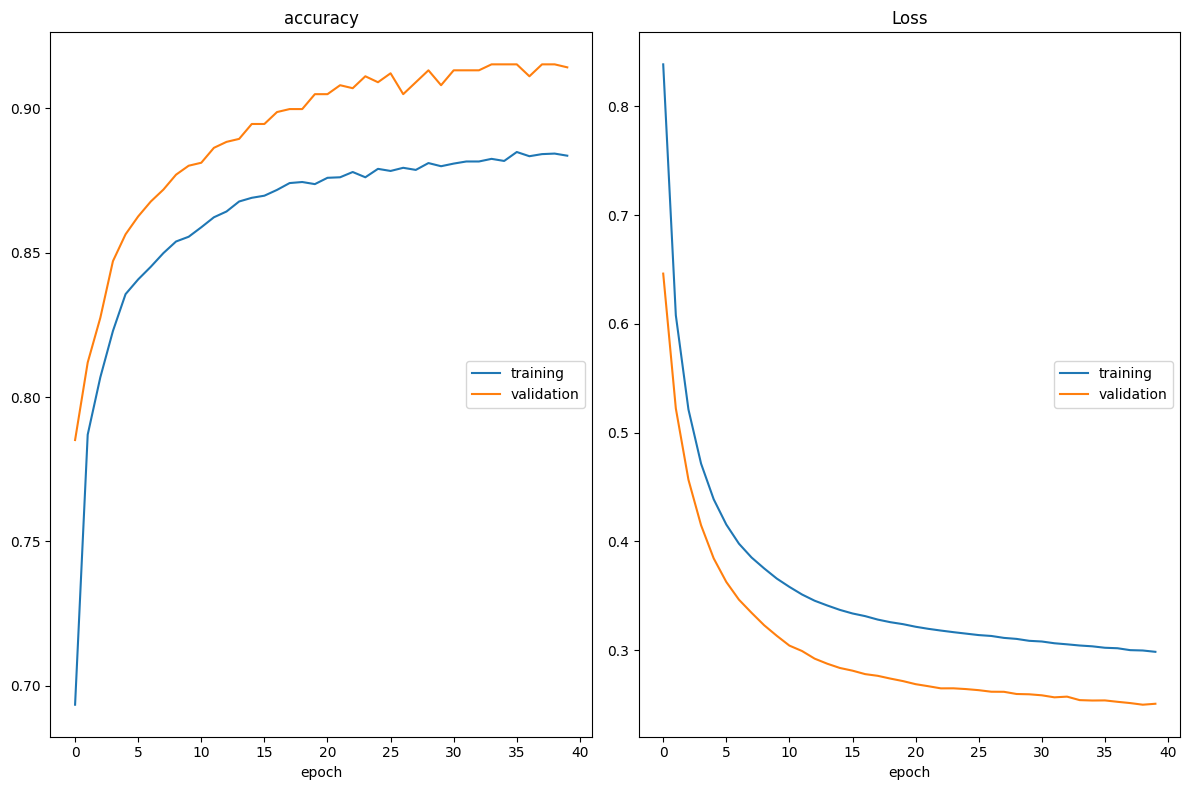

accuracy
	training         	 (min:    0.693, max:    0.885, cur:    0.884)
	validation       	 (min:    0.785, max:    0.915, cur:    0.914)
Loss
	training         	 (min:    0.299, max:    0.839, cur:    0.299)
	validation       	 (min:    0.250, max:    0.646, cur:    0.251)
51/51 [==============================] - 0s 3ms/step - loss: 0.3146 - accuracy: 0.8791
Test Loss of the model_1: 0.31463944911956787
Test Accuracy of the model_1: 0.8791072368621826


In [28]:
history = model_0.fit(X_train, y_train, 
                    epochs=40, 
                    batch_size=64,
                    validation_split=0.15, 
                    callbacks=[PlotLossesKeras()],
                    verbose=1)


# Evaluate the model on the test set
loss, accuracy = model_0.evaluate(X_test, y_test)

# Print the loss and accuracy
print("Test Loss of the model_1:", loss)
print("Test Accuracy of the model_1:", accuracy)

## Creating DNN model (improving MLP)

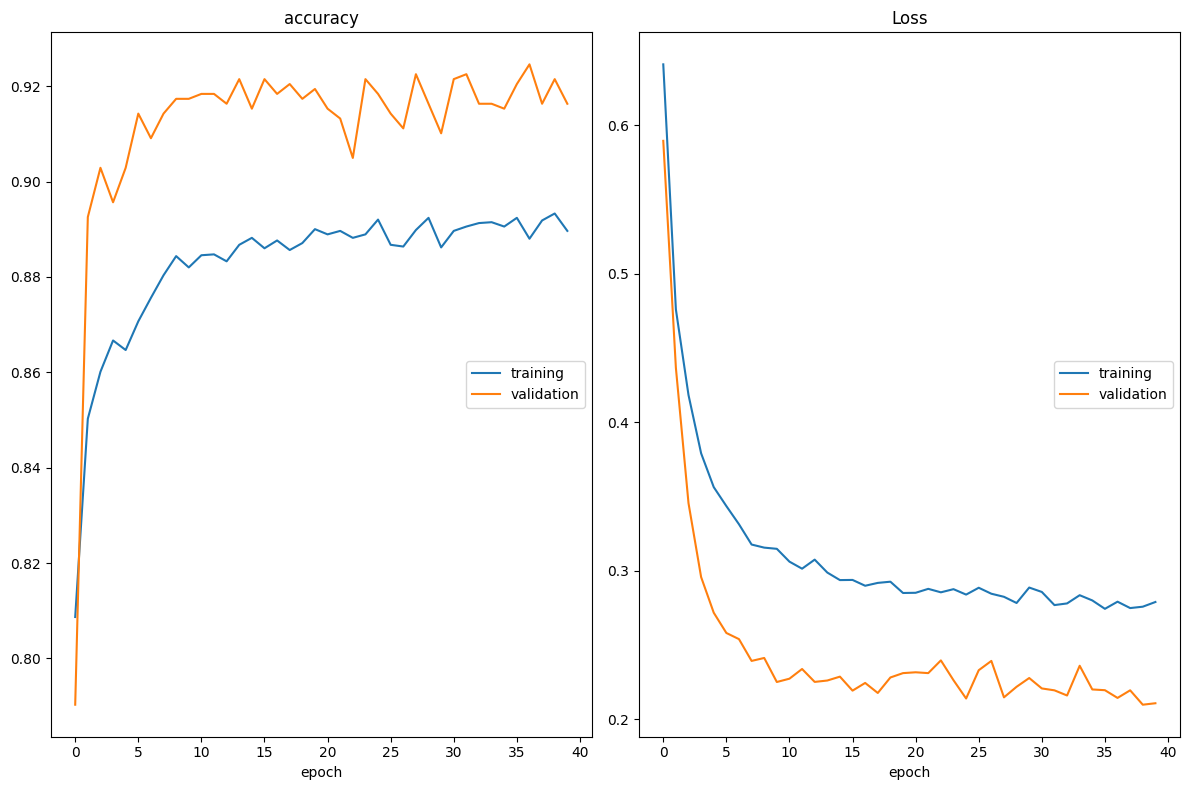

accuracy
	training         	 (min:    0.809, max:    0.893, cur:    0.890)
	validation       	 (min:    0.790, max:    0.925, cur:    0.916)
Loss
	training         	 (min:    0.274, max:    0.641, cur:    0.279)
	validation       	 (min:    0.210, max:    0.590, cur:    0.211)
51/51 [==============================] - 0s 2ms/step - loss: 0.2949 - accuracy: 0.8915
Test Loss of the model_1: 0.2948955297470093
Test Accuracy of the model_1: 0.8915064930915833


In [29]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization


def create_DNN_model():
    model = Sequential()
    
    # Input Layer
    model.add(Dense(64, input_dim=num_features, activation='relu'))

    # Hidden Layer(s)
    model.add(Dense(128, input_dim=num_features, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))


    # Output Layer
    model.add(Dense(num_classes, activation='softmax'))  # Softmax for multi-class classification

    opt = tf.keras.optimizers.Adam(learning_rate=0.001)


    # Compile the model
    model.compile(optimizer=opt, 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

model_1 = create_DNN_model()
model_1.summary()

# from tensorflow.keras.callbacks import EarlyStopping

# early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

history = model_1.fit(X_train, y_train, 
                    epochs=40, 
                    batch_size=64,
                    validation_split=0.15, 
                    callbacks=[PlotLossesKeras()],
                    verbose=1)

"""
history = model.fit(X_train, y_train, 
                    epochs=40, 
                    batch_size=64,
                    validation_split=0.15, 
                    callbacks=[PlotLossesKeras()],
                    verbose=1)
"""

# Evaluate the model on the test set
loss, accuracy = model_1.evaluate(X_test, y_test)

# Print the loss and accuracy
print("Test Loss of the model_1:", loss)
print("Test Accuracy of the model_1:", accuracy)
